In [1]:
import os
import xarray as xr
from glob import glob
import matplotlib.pyplot as plt
from cmocean import cm
import cartopy.crs as ccrs
import numpy as np
os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/shkifmjr/cartopy_images/'
import matplotlib.path as mpath
import cartopy.feature as cft
from matplotlib import colors
from matplotlib import axes

import warnings
warnings.simplefilter('ignore')

img = plt.imread('/home/shkifmjr/cartopy_images/BlueMarble_TOPO_010_FEB.png')

### Defining path and loading data

In [2]:
path_OR10 = '/home/shkifmmp/_WORK/postproc_ORION10/velocities/yearly/mops/climatology/'

path_ORC05_h1 = '/home/shkifmmp/_WORK/ORCA05/hind_1/climatology/'
path_ORC05_h2 = '/home/shkifmmp/_WORK/ORCA05/hind_2/climatology/'

path_obs = '/home/shkifmmp/_WORK/ORCA05/hind_1/climatology/observations/'

mask = '/scratch/usr/shklvn09/NUDATA/ORCA/05-data/meshmask/mesh_mask.nc'

In [3]:
tmask = xr.open_dataset(mask,
                      chunks={"z":46, "y":100, "x":100}).tmask.squeeze()

tmask = tmask.rename({'z':'deptht'}) #renaming it for mask and tracers to have same dimension name

ORCA05 hind_1 LP01

In [4]:
O2_ORC05_k17 = xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*O2_k17.nc')), 
                                chunks={"y":100, "x":100}).O2.squeeze().where(tmask.isel(deptht=0))
O2_ORC05_103w = xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*O2_103w.nc')), 
                                   chunks={"y":100, "deptht":46}).O2.squeeze().where(tmask.isel(x=368))
O2_ORC05_143e = xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*O2_143e.nc')), 
                                   chunks={"y":100, "deptht":46}).O2.squeeze().where(tmask.isel(x=141))

PO4_ORC05_k17 = xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*PO4_k17.nc')), 
                                   chunks={"y":100, "x":100}).PO4.squeeze().where(tmask.isel(deptht=0))
PO4_ORC05_103w = xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*PO4_103w.nc')), 
                                    chunks={"y":100, "deptht":46}).PO4.squeeze().where(tmask.isel(x=368))
PO4_ORC05_143e = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*PO4_143e.nc')), 
                                    chunks={"y":100, "deptht":46}).PO4.squeeze().where(tmask.isel(x=141)))

NO3_ORC05_k17 = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*NO3_k17.nc')), 
                                   chunks={"y":100, "x":100}).NO3.squeeze().where(tmask.isel(deptht=0)))
NO3_ORC05_103w = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*NO3_103w.nc')), 
                                    chunks={"y":100, "deptht":46}).NO3.squeeze().where(tmask.isel(x=368)))
NO3_ORC05_143e = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*NO3_143e.nc')), 
                                    chunks={"y":100, "deptht":46}).NO3.squeeze().where(tmask.isel(x=141)))

DICP_ORC05_k17 = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*DICP_k17.nc')), 
                                    chunks={"y":100, "x":100}).DICP.squeeze().where(tmask.isel(deptht=0)))
DICP_ORC05_103w = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*DICP_103w.nc')), 
                                     chunks={"y":100, "deptht":46}).DICP.squeeze().where(tmask.isel(x=368)))
DICP_ORC05_143e = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*DICP_143e.nc')), 
                                     chunks={"y":100, "deptht":46}).DICP.squeeze().where(tmask.isel(x=141)))

ALK_ORC05_k17 = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*ALK_k17.nc')), 
                                   chunks={"y":100, "x":100}).ALK.squeeze().where(tmask.isel(deptht=0)))
ALK_ORC05_103w = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*ALK_103w.nc')), 
                                    chunks={"y":100, "deptht":46}).ALK.squeeze().where(tmask.isel(x=368)))
ALK_ORC05_143e = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*ALK_143e.nc')), 
                                    chunks={"y":100, "deptht":46}).ALK.squeeze().where(tmask.isel(x=141)))

sal_ORC05_k17 = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*vosaline_k17.nc')), 
                                   chunks={"y":100, "x":100}).vosaline.squeeze().where(tmask.isel(deptht=0)))
sal_ORC05_103w = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*vosaline_103w.nc')), 
                                    chunks={"y":100, "deptht":46}).vosaline.squeeze().where(tmask.isel(x=368)))
sal_ORC05_143e = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*vosaline_143e.nc')), 
                                    chunks={"y":100, "deptht":46}).vosaline.squeeze().where(tmask.isel(x=141)))

In [ ]:
DICP_ORC05_2_k17

ORCA05 hind_2 LP09

In [5]:
O2_ORC05_2_k17 = xr.open_mfdataset(paths = sorted(glob(path_ORC05_h2 + 'OR*O2_k17.nc')), 
                                    chunks={"y":100, "x":100}).O2.squeeze().where(tmask.isel(deptht=0))
O2_ORC05_2_103w = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h2 + 'OR*O2_103w.nc')), 
                                     chunks={"y":100, "deptht":46}).O2.squeeze().where(tmask.isel(x=368)))
O2_ORC05_2_143e = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h2 + 'OR*O2_143e.nc')), 
                                     chunks={"y":100, "deptht":46}).O2.squeeze().where(tmask.isel(x=141)))

PO4_ORC05_2_k17 = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h2 + 'OR*PO4_k17.nc')), 
                                     chunks={"y":100, "x":100}).PO4.squeeze().where(tmask.isel(deptht=0)))
PO4_ORC05_2_103w = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h2 + 'OR*PO4_103w.nc')), 
                                      chunks={"y":100, "deptht":46}).PO4.squeeze().where(tmask.isel(x=368)))
PO4_ORC05_2_143e = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h2 + 'OR*PO4_143e.nc')), 
                                      chunks={"y":100, "deptht":46}).PO4.squeeze().where(tmask.isel(x=141)))

NO3_ORC05_2_k17 = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h2 + 'OR*NO3_k17.nc')), 
                                     chunks={"y":100, "x":100}).NO3.squeeze().where(tmask.isel(deptht=0)))
NO3_ORC05_2_103w = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h2 + 'OR*NO3_103w.nc')), 
                                      chunks={"y":100, "deptht":46}).NO3.squeeze().where(tmask.isel(x=368)))
NO3_ORC05_2_143e = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h2 + 'OR*NO3_143e.nc')), 
                                      chunks={"y":100, "deptht":46}).NO3.squeeze().where(tmask.isel(x=141)))

DICP_ORC05_2_k17 = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h2 + 'OR*DICP_k17.nc')), 
                                      chunks={"y":100, "x":100}).DICP.squeeze().where(tmask.isel(deptht=0)))
DICP_ORC05_2_103w = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h2 + 'OR*DICP_103w.nc')), 
                                       chunks={"y":100, "deptht":46}).DICP.squeeze().where(tmask.isel(x=368)))
DICP_ORC05_2_143e = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h2 + 'OR*DICP_143e.nc')), 
                                       chunks={"y":100, "deptht":46}).DICP.squeeze().where(tmask.isel(x=141)))

ALK_ORC05_2_k17 = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h2 + 'OR*ALK_k17.nc')), 
                                     chunks={"y":100, "x":100}).ALK.squeeze().where(tmask.isel(deptht=0)))
ALK_ORC05_2_103w = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h2 + 'OR*ALK_103w.nc')), 
                                      chunks={"y":100, "deptht":46}).ALK.squeeze().where(tmask.isel(x=368)))
ALK_ORC05_2_143e = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h2 + 'OR*ALK_143e.nc')), 
                                      chunks={"y":100, "deptht":46}).ALK.squeeze().where(tmask.isel(x=141)))

sal_ORC05_2_k17 = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h2 + 'OR*vosaline_k17.nc')), 
                                     chunks={"y":100, "x":100}).vosaline.squeeze().where(tmask.isel(deptht=0)))
sal_ORC05_2_103w = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h2 + 'OR*vosaline_103w.nc')), 
                                      chunks={"y":100, "deptht":46}).vosaline.squeeze().where(tmask.isel(x=368)))
sal_ORC05_2_143e = (xr.open_mfdataset(paths = sorted(glob(path_ORC05_h2 + 'OR*vosaline_143e.nc')), 
                                      chunks={"y":100, "deptht":46}).vosaline.squeeze().where(tmask.isel(x=141)))

ORION 10

In [6]:
O2_OR10_k17 = (xr.open_mfdataset(paths = sorted(glob(path_OR10 + 'OR*O2_k17.nc')), 
                                 chunks={"y":100, "x":100}).O2.squeeze().where(tmask.isel(deptht=0)))
O2_OR10_103w = (xr.open_mfdataset(paths = sorted(glob(path_OR10 + 'OR*O2_103w.nc')), 
                                  chunks={"y":100, "deptht":46}).O2.squeeze().where(tmask.isel(x=368)))
O2_OR10_143e = (xr.open_mfdataset(paths = sorted(glob(path_OR10 + 'OR*O2_143e.nc')), 
                                  chunks={"y":100, "deptht":46}).O2.squeeze().where(tmask.isel(x=141)))

PO4_OR10_k17 = (xr.open_mfdataset(paths = sorted(glob(path_OR10 + 'OR*PO4_k17.nc')), 
                                  chunks={"y":100, "x":100}).PO4.squeeze().where(tmask.isel(deptht=0)))
PO4_OR10_103w = (xr.open_mfdataset(paths = sorted(glob(path_OR10 + 'OR*PO4_103w.nc')), 
                                   chunks={"y":100, "deptht":46}).PO4.squeeze().where(tmask.isel(x=368)))
PO4_OR10_143e = (xr.open_mfdataset(paths = sorted(glob(path_OR10 + 'OR*PO4_143e.nc')), 
                                   chunks={"y":100, "deptht":46}).PO4.squeeze().where(tmask.isel(x=141)))

NO3_OR10_k17 = (xr.open_mfdataset(paths = sorted(glob(path_OR10 + 'OR*NO3_k17.nc')), 
                                  chunks={"y":100, "x":100}).NO3.squeeze().where(tmask.isel(deptht=0)))
NO3_OR10_103w = (xr.open_mfdataset(paths = sorted(glob(path_OR10 + 'OR*NO3_103w.nc')), 
                                   chunks={"y":100, "deptht":46}).NO3.squeeze().where(tmask.isel(x=368)))
NO3_OR10_143e = (xr.open_mfdataset(paths = sorted(glob(path_OR10 + 'OR*NO3_143e.nc')), 
                                   chunks={"y":100, "deptht":46}).NO3.squeeze().where(tmask.isel(x=141)))

DICP_OR10_k17 = (xr.open_mfdataset(paths = sorted(glob(path_OR10 + 'OR*DICP_k17.nc')), 
                                   chunks={"y":100, "x":100}).DICP.squeeze().where(tmask.isel(deptht=0)))
DICP_OR10_103w = (xr.open_mfdataset(paths = sorted(glob(path_OR10 + 'OR*DICP_103w.nc')), 
                                    chunks={"y":100, "deptht":46}).DICP.squeeze().where(tmask.isel(x=368)))
DICP_OR10_143e = (xr.open_mfdataset(paths = sorted(glob(path_OR10 + 'OR*DICP_143e.nc')), 
                                    chunks={"y":100, "deptht":46}).DICP.squeeze().where(tmask.isel(x=141)))

ALK_OR10_k17 = (xr.open_mfdataset(paths = sorted(glob(path_OR10 + 'OR*ALK_k17.nc')), 
                                  chunks={"y":100, "x":100}).ALK.squeeze().where(tmask.isel(deptht=0)))
ALK_OR10_103w = (xr.open_mfdataset(paths = sorted(glob(path_OR10 + 'OR*ALK_103w.nc')), 
                                   chunks={"y":100, "deptht":46}).ALK.squeeze().where(tmask.isel(x=368)))
ALK_OR10_143e = (xr.open_mfdataset(paths = sorted(glob(path_OR10 + 'OR*ALK_143e.nc')), 
                                   chunks={"y":100, "deptht":46}).ALK.squeeze().where(tmask.isel(x=141)))

sal_OR10_k17 = (xr.open_mfdataset(paths = sorted(glob(path_OR10 + 'OR*vosaline_k17.nc')), 
                                  chunks={"y":100, "x":100}).vosaline.squeeze().where(tmask.isel(deptht=0)))
sal_OR10_103w = (xr.open_mfdataset(paths = sorted(glob(path_OR10 + 'OR*vosaline_103w.nc')), 
                                   chunks={"y":100, "deptht":46}).vosaline.squeeze().where(tmask.isel(x=368)))
sal_OR10_143e = (xr.open_mfdataset(paths = sorted(glob(path_OR10 + 'OR*vosaline_143e.nc')), 
                                   chunks={"y":100, "deptht":46}).vosaline.squeeze().where(tmask.isel(x=141)))

Observations

In [7]:
#xarray complains if there are variables and dimensions with the same name, had to use ncrename to change the dimensions name

O2_obs_k17 = (xr.open_mfdataset(paths = sorted(glob(path_obs + '*O2_k17.nc')), 
                               chunks={"time_counter":12, "y":100, "x":100}).o_an.mean(dim='time_counter').squeeze().where(tmask.isel(deptht=0)) * 44.66)
O2_obs_103w = (xr.open_mfdataset(paths = sorted(glob(path_obs + '*O2_103w.nc')), 
                                chunks={"time_counter":12, "y":100, "deptht":46}).o_an.mean(dim='time_counter').squeeze().where(tmask.isel(x=368)) * 44.66)
O2_obs_143e = (xr.open_mfdataset(paths = sorted(glob(path_obs + '*O2_143e.nc')), 
                                chunks={"time_counter":12, "y":100, "deptht":46}).o_an.mean(dim='time_counter').squeeze().where(tmask.isel(x=141)) * 44.66)

PO4_obs_k17 = (xr.open_mfdataset(paths = sorted(glob(path_obs + '*PO4_k17.nc')), 
                                chunks={"time_counter":12, "y":100, "x":100}).p_an.mean(dim='time_counter').squeeze().where(tmask.isel(deptht=0)))
PO4_obs_103w = (xr.open_mfdataset(paths = sorted(glob(path_obs + '*PO4_103w.nc')), 
                                  chunks={"time_counter":12, "y":100, "deptht":46}).p_an.mean(dim='time_counter').squeeze().where(tmask.isel(x=368)))
PO4_obs_143e = (xr.open_mfdataset(paths = sorted(glob(path_obs + '*PO4_143e.nc')), 
                                  chunks={"time_counter":12, "y":100, "deptht":46}).p_an.mean(dim='time_counter').squeeze().where(tmask.isel(x=141)))

NO3_obs_k17 = (xr.open_mfdataset(paths = sorted(glob(path_obs + '*NO3_k17.nc')), 
                                 chunks={"time_counter":12, "y":100, "x":100}).n_an.mean(dim='time_counter').squeeze().where(tmask.isel(deptht=0)))
NO3_obs_103w = (xr.open_mfdataset(paths = sorted(glob(path_obs + '*NO3_103e.nc')), 
                                  chunks={"time_counter":12, "y":100, "deptht":46}).n_an.mean(dim='time_counter').squeeze().where(tmask.isel(x=368))) #file with wrong name
NO3_obs_143e = (xr.open_mfdataset(paths = sorted(glob(path_obs + '*NO3_143e.nc')), 
                                  chunks={"time_counter":12, "y":100, "deptht":46}).n_an.mean(dim='time_counter').squeeze().where(tmask.isel(x=141)))

DICP_obs_k17 = (xr.open_mfdataset(paths = sorted(glob(path_obs + '*DICP_k17.nc')), 
                                  chunks={"time_counter":12, "y":100, "x":100}).PI_TCO2.mean(dim='time_counter').squeeze().where(tmask.isel(deptht=0)))
DICP_obs_103w = (xr.open_mfdataset(paths = sorted(glob(path_obs + '*DICP_103w.nc')), 
                                   chunks={"time_counter":12, "y":100, "deptht":46}).PI_TCO2.mean(dim='time_counter').squeeze().where(tmask.isel(x=368)))
DICP_obs_143e = (xr.open_mfdataset(paths = sorted(glob(path_obs + '*DICP_143e.nc')), 
                                   chunks={"time_counter":12, "y":100, "deptht":46}).PI_TCO2.mean(dim='time_counter').squeeze().where(tmask.isel(x=141)))

ALK_obs_k17 = (xr.open_mfdataset(paths = sorted(glob(path_obs + '*ALK_k17.nc')), 
                                 chunks={"time_counter":12, "y":100, "x":100}).TAlk.mean(dim='time_counter').squeeze().where(tmask.isel(deptht=0)))
ALK_obs_103w = (xr.open_mfdataset(paths = sorted(glob(path_obs + '*ALK_103w.nc')), 
                                  chunks={"time_counter":12, "y":100, "deptht":46}).TAlk.mean(dim='time_counter').squeeze().where(tmask.isel(x=368)))
ALK_obs_143e = (xr.open_mfdataset(paths = sorted(glob(path_obs + '*ALK_143e.nc')), 
                                  chunks={"time_counter":12, "y":100, "deptht":46}).TAlk.mean(dim='time_counter').squeeze().where(tmask.isel(x=141)))

sal_obs_k17 = (xr.open_mfdataset(paths = sorted(glob(path_obs + '*vosaline_k17.nc')), 
                                 chunks={"time_counter":12, "y":100, "x":100}).vosaline.mean(dim='time_counter').squeeze().where(tmask.isel(deptht=0)))
sal_obs_103w = (xr.open_mfdataset(paths = sorted(glob(path_obs + '*vosaline_103w.nc')), 
                                  chunks={"time_counter":12, "y":100, "deptht":46}).vosaline.mean(dim='time_counter').squeeze().where(tmask.isel(x=368)))
sal_obs_143e = (xr.open_mfdataset(paths = sorted(glob(path_obs + '*vosaline_143e.nc')), 
                                  chunks={"time_counter":12, "y":100, "deptht":46}).vosaline.mean(dim='time_counter').squeeze().where(tmask.isel(x=141)))

In [8]:
#for the latitude X depth sections
lat = xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*O2_k17.nc')), chunks={"y":100, "x":100}).nav_lat
lon = xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*O2_k17.nc')), chunks={"y":100, "x":100}).nav_lon
depth = xr.open_mfdataset(paths = sorted(glob(path_ORC05_h1 + 'OR*O2_103w.nc')), chunks={"y":100, "deptht":46}).deptht

### Changing nav_lon and nav_lat for plotting / Get rid off discontinuity in the grid

In [39]:
# def lon_without_discontinuity(inputDict):
#     for items in inputDict.items:
#         items.coords['x'] = range(len(items.x))
#         items.coords['y'] = range(len(items.y))

#         after_discont = ~(items.coords["nav_lon"].diff("x", label="upper") > 0).cumprod("x").astype(bool)

#         items.coords["nav_lon"] = (
#             items.coords["nav_lon"]
#             + 360 * after_discont
#         )
#         items = items.isel(x=slice(1, -1), y=slice(None, -1))

In [9]:
#Defining dictionary to call variables in the functions - There are wiser ways of doing it
vari = {'O2_obs_k17': O2_obs_k17, 'NO3_obs_k17': NO3_obs_k17, 'PO4_obs_k17': PO4_obs_k17, 'DICP_obs_k17': DICP_obs_k17, 'ALK_obs_k17': ALK_obs_k17, 'sal_obs_k17': sal_obs_k17,
       'O2_obs_143e': O2_obs_143e, 'NO3_obs_143e': NO3_obs_143e, 'PO4_obs_143e': PO4_obs_143e, 'DICP_obs_143e': DICP_obs_143e, 'ALK_obs_143e': ALK_obs_143e, 'sal_obs_143e': sal_obs_143e,
       'O2_obs_103w': O2_obs_103w, 'NO3_obs_103w': NO3_obs_103w, 'PO4_obs_103w': PO4_obs_103w, 'DICP_obs_103w': DICP_obs_103w, 'ALK_obs_103w': ALK_obs_103w, 'sal_obs_103w': sal_obs_103w,
       'O2_OR10_k17': O2_OR10_k17, 'NO3_OR10_k17': NO3_OR10_k17, 'PO4_OR10_k17': PO4_OR10_k17, 'DICP_OR10_k17': DICP_OR10_k17, 'ALK_OR10_k17': ALK_OR10_k17, 'sal_OR10_k17': sal_OR10_k17,
       'O2_OR10_143e': O2_OR10_143e, 'NO3_OR10_143e': NO3_OR10_143e, 'PO4_OR10_143e': PO4_OR10_143e, 'DICP_OR10_143e': DICP_OR10_143e, 'ALK_OR10_143e': ALK_OR10_143e, 'sal_OR10_143e': sal_OR10_143e,
       'O2_OR10_103w': O2_OR10_103w, 'NO3_OR10_103w': NO3_OR10_103w, 'PO4_OR10_103w': PO4_OR10_103w, 'DICP_OR10_103w': DICP_OR10_103w, 'ALK_OR10_103w': ALK_OR10_103w, 'sal_OR10_103w': sal_OR10_103w,
       'O2_ORC05_k17': O2_ORC05_k17, 'NO3_ORC05_k17': NO3_ORC05_k17, 'PO4_ORC05_k17': PO4_ORC05_k17, 'DICP_ORC05_k17': DICP_ORC05_k17, 'ALK_ORC05_k17': ALK_ORC05_k17, 'sal_ORC05_k17': sal_ORC05_k17,
       'O2_ORC05_143e': O2_ORC05_143e, 'NO3_ORC05_143e': NO3_ORC05_143e, 'PO4_ORC05_143e': PO4_ORC05_143e, 'DICP_ORC05_143e': DICP_ORC05_143e, 'ALK_ORC05_143e': ALK_ORC05_143e, 'sal_ORC05_143e': sal_ORC05_143e,
       'O2_ORC05_103w': O2_ORC05_103w, 'NO3_ORC05_103w': NO3_ORC05_103w, 'PO4_ORC05_103w': PO4_ORC05_103w, 'DICP_ORC05_103w': DICP_ORC05_103w, 'ALK_ORC05_103w': ALK_ORC05_103w, 'sal_ORC05_103w': sal_ORC05_103w,
       'O2_ORC05_2_k17': O2_ORC05_2_k17, 'NO3_ORC05_2_k17': NO3_ORC05_2_k17, 'PO4_ORC05_2_k17': PO4_ORC05_2_k17, 'DICP_ORC05_2_k17': DICP_ORC05_2_k17, 'ALK_ORC05_2_k17': ALK_ORC05_2_k17, 'sal_ORC05_2_k17': sal_ORC05_2_k17,
       'O2_ORC05_2_143e': O2_ORC05_2_143e, 'NO3_ORC05_2_143e': NO3_ORC05_2_143e, 'PO4_ORC05_2_143e': PO4_ORC05_2_143e, 'DICP_ORC05_2_143e': DICP_ORC05_2_143e, 'ALK_ORC05_2_143e': ALK_ORC05_2_143e, 'sal_ORC05_2_143e': sal_ORC05_2_143e,
       'O2_ORC05_2_103w': O2_ORC05_2_103w, 'NO3_ORC05_2_103w': NO3_ORC05_2_103w, 'PO4_ORC05_2_103w': PO4_ORC05_2_103w, 'DICP_ORC05_2_103w': DICP_ORC05_2_103w, 'ALK_ORC05_2_103w': ALK_ORC05_2_103w, 'sal_ORC05_2_103w': sal_ORC05_2_103w}

In [10]:
# Solving discontinuity in the grid 
for tracer in ['O2', 'DICP', 'NO3', 'PO4', 'sal', 'ALK']:
    #obs  = vari[tracer+'_obs_k17']
    OR10  = vari[tracer+'_OR10_k17']
    ORC05  = vari[tracer+'_ORC05_k17']
    ORC05_2  = vari[tracer+'_ORC05_2_k17']

    for models in [OR10, ORC05, ORC05_2]:
        models.coords['x'] = range(len(models.x))
        models.coords['y'] = range(len(models.y))

        after_discont = ~(models.coords["nav_lon"].diff("x", label="upper") > 0).cumprod("x").astype(bool)

        models.coords["nav_lon"] = (
            models.coords["nav_lon"]
            + 360 * after_discont
        )
        #models = models.isel(x=slice(1, -1), y=slice(None, -1)) #DONT WORK (why?)
    vari[tracer+'_OR10_k17'] = OR10
    vari[tracer+'_ORC05_k17'] = ORC05
    vari[tracer+'_ORC05_2_k17'] = ORC05_2

In [11]:
# Crop to non-redundant part of the mesh
O2_ORC05_k17 = O2_ORC05_k17.isel(x=slice(1, -1), y=slice(None, -1))
DICP_ORC05_k17 = DICP_ORC05_k17.isel(x=slice(1, -1), y=slice(None, -1))
PO4_ORC05_k17 = PO4_ORC05_k17.isel(x=slice(1, -1), y=slice(None, -1))
NO3_ORC05_k17 = NO3_ORC05_k17.isel(x=slice(1, -1), y=slice(None, -1))
ALK_ORC05_k17 = ALK_ORC05_k17.isel(x=slice(1, -1), y=slice(None, -1))
sal_ORC05_k17 = sal_ORC05_k17.isel(x=slice(1, -1), y=slice(None, -1))

O2_ORC05_2_k17 = O2_ORC05_2_k17.isel(x=slice(1, -1), y=slice(None, -1))
DICP_ORC05_2_k17 = DICP_ORC05_2_k17.isel(x=slice(1, -1), y=slice(None, -1))
PO4_ORC05_2_k17 = PO4_ORC05_2_k17.isel(x=slice(1, -1), y=slice(None, -1))
NO3_ORC05_2_k17 = NO3_ORC05_2_k17.isel(x=slice(1, -1), y=slice(None, -1))
ALK_ORC05_2_k17 = ALK_ORC05_2_k17.isel(x=slice(1, -1), y=slice(None, -1))
sal_ORC05_2_k17 = sal_ORC05_2_k17.isel(x=slice(1, -1), y=slice(None, -1))

O2_OR10_k17 = O2_OR10_k17.isel(x=slice(1, -1), y=slice(None, -1))
DICP_OR10_k17 = DICP_OR10_k17.isel(x=slice(1, -1), y=slice(None, -1))
PO4_OR10_k17 = PO4_OR10_k17.isel(x=slice(1, -1), y=slice(None, -1))
NO3_OR10_k17 = NO3_OR10_k17.isel(x=slice(1, -1), y=slice(None, -1))
ALK_OR10_k17 = ALK_OR10_k17.isel(x=slice(1, -1), y=slice(None, -1))
sal_OR10_k17 = sal_OR10_k17.isel(x=slice(1, -1), y=slice(None, -1))

## Sections

In [72]:
np.where(lat>=-67)

(array([ 67,  67,  67, ..., 510, 510, 510]),
 array([  0,   1,   2, ..., 719, 720, 721]))

In [34]:
# 103w
def plot_tracer_103w(tracer): 
    """ 
        Plot tracers in longitudinal sections at 103W.
        input: 'O2', 'NO3', 'PO4', 'DICP', 'ALK' or 'sal' (salinity)
        y axis: depth; x axis: longitude
    """
    
    #geting the variables using the dictionary (dictionary links a string to a variable)
    obs  = vari[tracer+'_obs_103w']
    OR10  = vari[tracer+'_OR10_103w']
    ORC05  = vari[tracer+'_ORC05_103w']
    ORC05_2  = vari[tracer+'_ORC05_2_103w']
    
    #strings for colorbar title
    if tracer == 'NO3' or tracer == 'PO4' or tracer == 'O2':
        str1 = '$mmol.m^{3}$'
    elif tracer == 'DICP' or tracer == 'ALK':
        str1 = '$\mu$mol.m$^{3}$'
    elif tracer == 'sal':
        str1 = ''
        
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(14,24)) 
    
    #Suptitle
    if tracer == 'sal':
        plt.suptitle(' Salinity (Longitude 103W)', x=0.45, fontsize=18, y=0.92)
    else:
        plt.suptitle(' {} (Longitude 103W)'.format(tracer), x=0.45, fontsize=18, y=0.92)
    
    map1 = (axs[0].contourf(lat.isel(y=slice(30,186),x=0), depth[:-2], obs.isel(y=slice(30,186),deptht=slice(0,44)), 
                            levels=50, cmap= cm.tarn,norm= colors.Normalize(), linestyles=None))
    
    
    
    map2 = (axs[1].contourf(lat.isel(y=slice(30,186),x=0), depth[:-2], 
                            (ORC05 - obs).isel(y=slice(30,186),deptht=slice(0,44)), 
                            levels=50,
                          cmap= cm.balance ,norm= colors.TwoSlopeNorm(vcenter=0)))
    
    
    anom2 = (ORC05_2 - obs).isel(y=slice(30,186),deptht=slice(0,44))
    
    if tracer == 'PO4':
        CS = axs[1].contour(lat.isel(y=slice(30,186),x=0), depth[:-2], anom2, colors='k', levels=6)
    else: 
        CS = axs[1].contour(lat.isel(y=slice(30,186),x=0), depth[:-2], anom2, colors='k')
    axs[1].clabel(CS, inline=True, fmt='%1.1f')

    anom3 = (OR10 - obs).isel(y=slice(30,186),deptht=slice(0,44))                     
    map3 = (axs[2].contourf(lat.isel(y=slice(30,186),x=0), depth[:-2], anom3, levels=50,
                          cmap= cm.balance ,norm= colors.TwoSlopeNorm(vcenter=0)))
    
    # titles
    if tracer == 'sal':
        axs[0].set_title('Observations GLODAPv2 (Climatology)', fontsize=18)
        axs[1].set_title('ORCA05 (1990-2009 mean) - WOA98. Shading (LP1), contours (LP9) ', fontsize=18)
        axs[2].set_title('ORION10 (1990-2009 mean) - WOA98', fontsize=18)
    else:
        if tracer == 'ALK' or tracer == 'DICP':
            axs[0].set_title('Observations GLODAPv2 (Climatology)', fontsize=18)
            axs[1].set_title('ORCA05 (1990-2009 mean) - GLODAPv2. Shading (LP1), contours (LP9) ', fontsize=18)
            axs[2].set_title('ORION10 (1990-2009 mean) - GLODAPv2', fontsize=18)
        else:
            axs[0].set_title('Observations WOA13v2 (Climatology)', fontsize=18)
            axs[1].set_title('ORCA05 (1990-2009 mean) - WOA13v2. Shading (LP1), contours (LP9) ', fontsize=18)
            axs[2].set_title('ORION10 (1990-2009 mean) - WOA13v2', fontsize=18)
    
    #other parameters
    for maps, ax in zip([map1, map2, map3], axs):
        c = plt.colorbar(maps, pad=0.02, shrink=0.7, ax=ax)
        c.ax.set_title(str1, loc='left', fontsize=14)
        c.ax.tick_params(labelsize=14)
        ax.invert_yaxis()
        ax.set_ylabel('Depth', fontsize=16)
        axes.Axes.tick_params(ax, axis='both' ,labelsize=14)
        
    axs[2].set_xlabel('Latitude', fontsize=16)
    
    savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/figures/'
    plt.savefig(savepath + '{}_103w.png'.format(tracer), format='png', facecolor="w")

In [25]:
def plot_tracer_143e(tracer): 
    """ 
        Plot tracers in longitudinal sections at 143e.
        input: 'O2', 'NO3', 'PO4', 'DICP', 'ALK' or 'sal' (salinity)
        y axis: depth; x axis: longitude
    """
    
    #geting the variables using the dictionary (dictionary links a string to a variable)
    obs  = vari[tracer+'_obs_143e']
    OR10  = vari[tracer+'_OR10_143e']
    ORC05  = vari[tracer+'_ORC05_143e']
    ORC05_2  = vari[tracer+'_ORC05_2_143e']
    
    #string for colorbar title
    if tracer == 'NO3' or tracer == 'PO4' or tracer == 'O2':
        str1 = '$mmol.m^{3}$'
    elif tracer == 'DICP' or tracer == 'ALK':
        str1 = '$\mu$mol.m$^{3}$'
    elif tracer == 'sal':
        str1 = ''
        
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(14,24)) 
    
    # Suptitle
    if tracer == 'sal':
        plt.suptitle(' Salinity (Longitude 143E)', x=0.45, fontsize=18, y=0.92)
    else:
        plt.suptitle(' {} (Longitude 143E)'.format(tracer), x=0.45, fontsize=18, y=0.92)
        
    # plotting    
    map1 = (axs[0].contourf(lat.isel(y=slice(67,166), x=0), depth[:-3], obs.isel(y=slice(67,166), deptht=slice(0,43)), levels=50, 
                             cmap= cm.tarn,norm= colors.Normalize(), linestyles=None))
            
    map2 = (axs[1].contourf(lat.isel(y=slice(67,166), x=0), depth[:-3], (ORC05 - obs).isel(y=slice(67,166), deptht=slice(0,43)),
                         levels=50, cmap= cm.balance,norm= colors.TwoSlopeNorm(vcenter=0)))
                
    CS = axs[1].contour(lat.isel(y=slice(67,166), x=0), depth[:-3], (ORC05_2 - obs).isel(y=slice(67,166), deptht=slice(0,43)), colors='k')
    axs[1].clabel(CS, inline=True, fmt='%1.1f')

    map3 = (axs[2].contourf(lat.isel(y=slice(67,166), x=0), depth[:-3], (OR10 - obs).isel(y=slice(67,166), deptht=slice(0,43)), levels=50,
                              cmap= cm.balance, norm= colors.TwoSlopeNorm(vcenter=0)))
    
    # titles
    if tracer == 'sal':
        axs[0].set_title('Observations GLODAPv2 (Climatology)', fontsize=18)
        axs[1].set_title('ORCA05 (1990-2009 mean) - WOA98. Shading (LP1), contours (LP9) ', fontsize=18)
        axs[2].set_title('ORION10 (1990-2009 mean) - WOA98', fontsize=18)
    else:
        if tracer == 'ALK' or tracer == 'DICP':
            axs[0].set_title('Observations GLODAPv2 (Climatology)', fontsize=18)
            axs[1].set_title('ORCA05 (1990-2009 mean) - GLODAPv2. Shading (LP1), contours (LP9) ', fontsize=18)
            axs[2].set_title('ORION10 (1990-2009 mean) - GLODAPv2', fontsize=18)
        else:
            axs[0].set_title('Observations WOA13v2 (Climatology)', fontsize=18)
            axs[1].set_title('ORCA05 (1990-2009 mean) - WOA13v2. Shading (LP1), contours (LP9) ', fontsize=18)
            axs[2].set_title('ORION10 (1990-2009 mean) - WOA13v2', fontsize=18)
    
    #other parameters
    for maps, ax in zip([map1, map2, map3], axs):
        c = plt.colorbar(maps, pad=0.02, shrink=0.7, ax=ax)
        c.ax.set_title(str1, loc='left', fontsize=14)
        c.ax.tick_params(labelsize=14)
        ax.invert_yaxis()
        ax.set_ylabel('Depth', fontsize=16)
        axes.Axes.tick_params(ax, axis='both' ,labelsize=14)
    
    axs[2].set_xlabel('Latitude', fontsize=16)
    
    savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/figures/'
    plt.savefig(savepath + '{}_143e.png'.format(tracer), format='png', facecolor="w")

### 143E

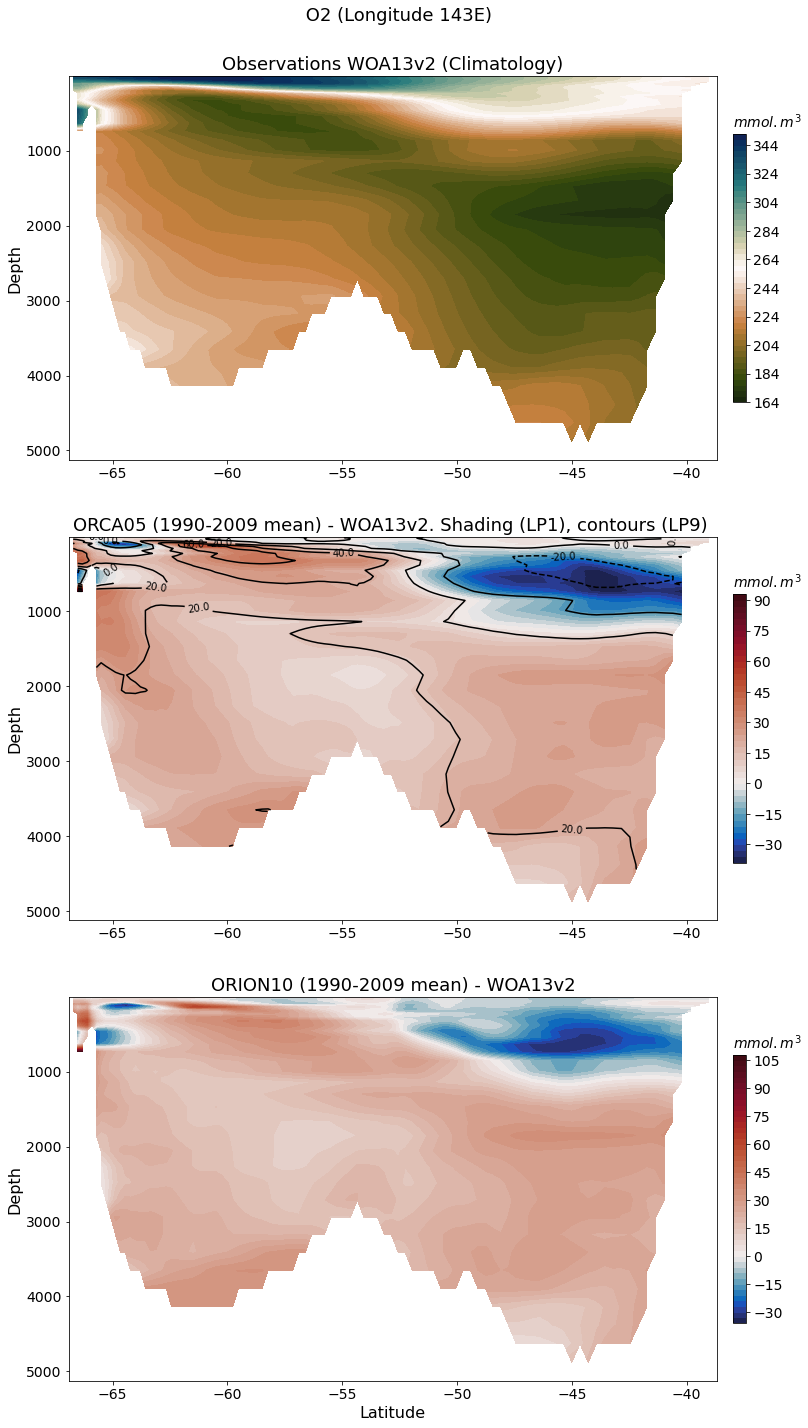

In [26]:
plot_tracer_143e('O2')

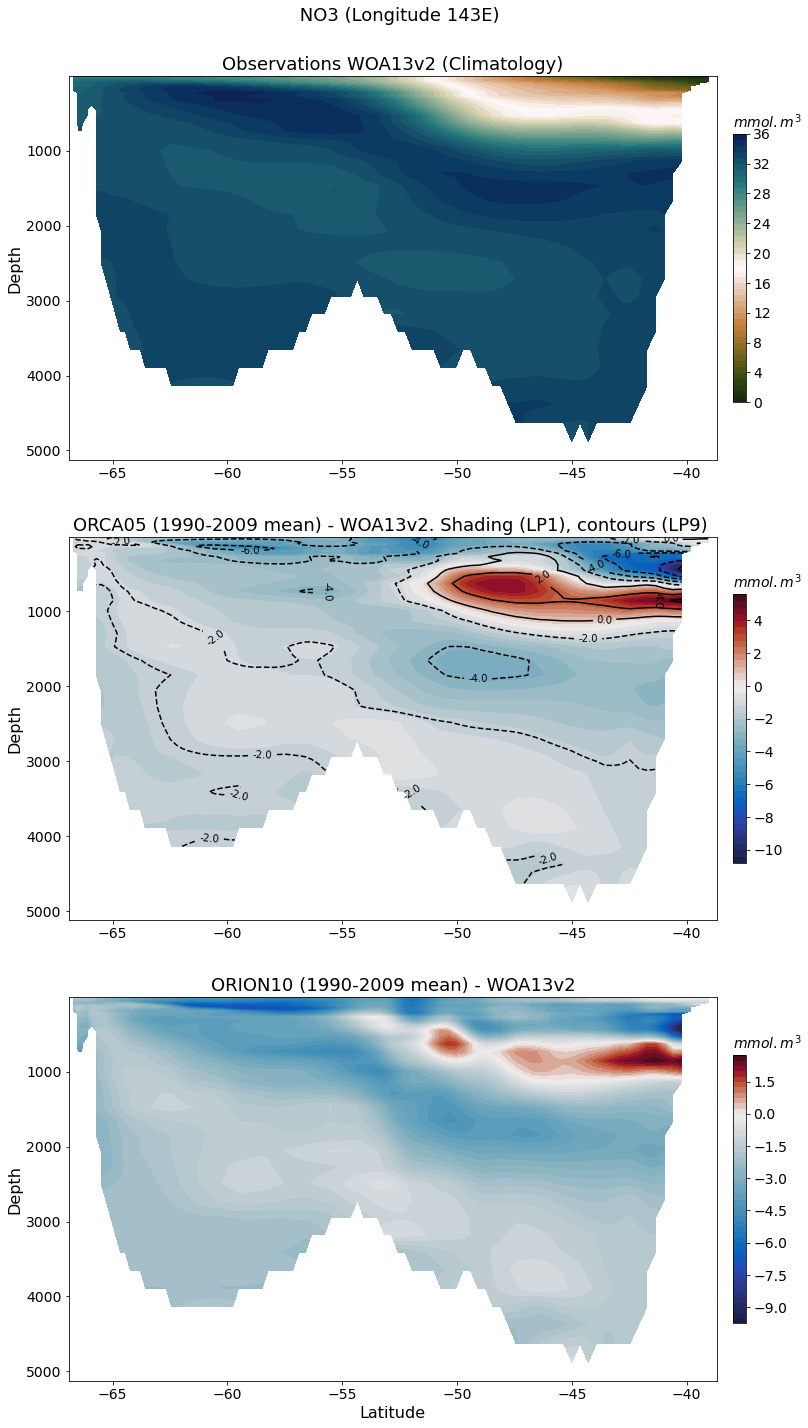

In [27]:
plot_tracer_143e('NO3')

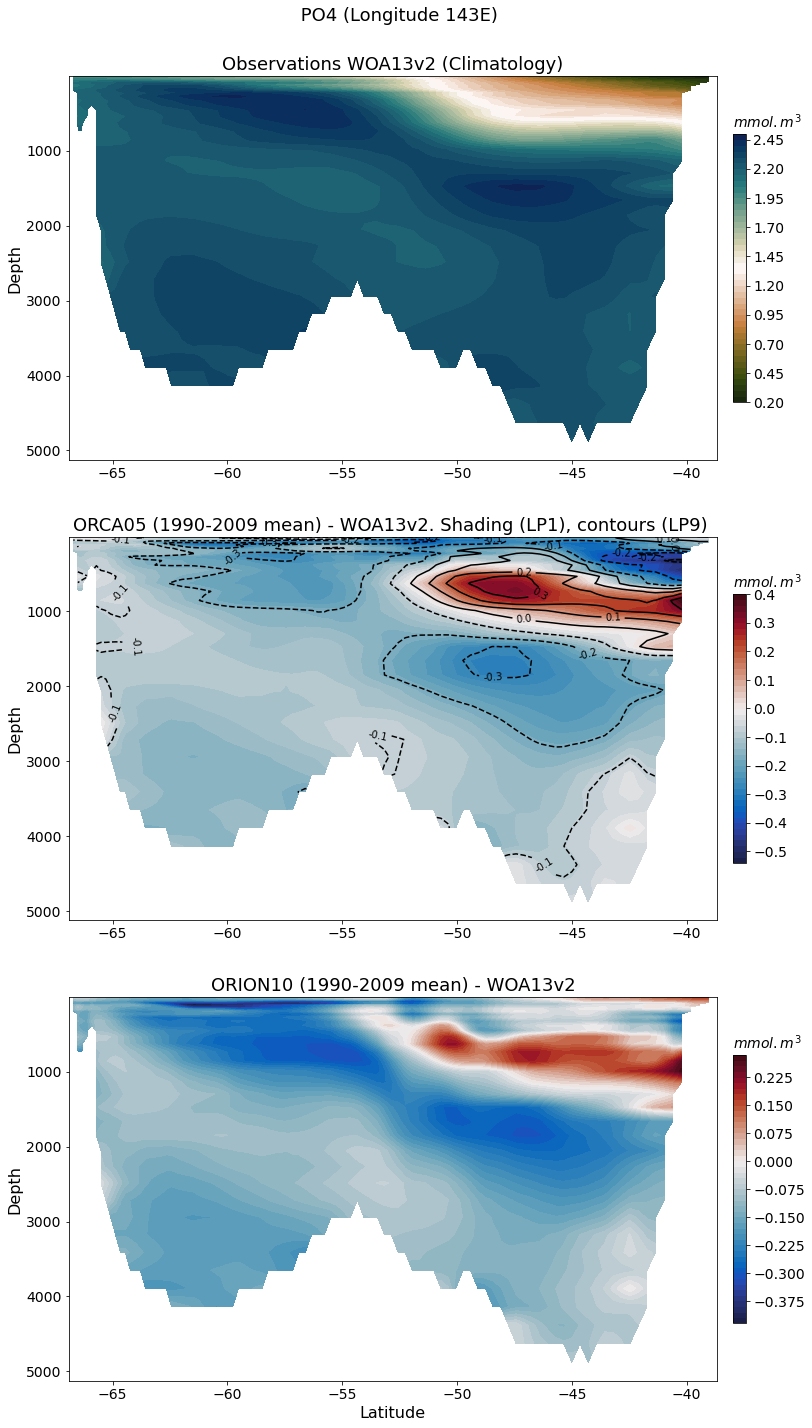

In [28]:
plot_tracer_143e('PO4')

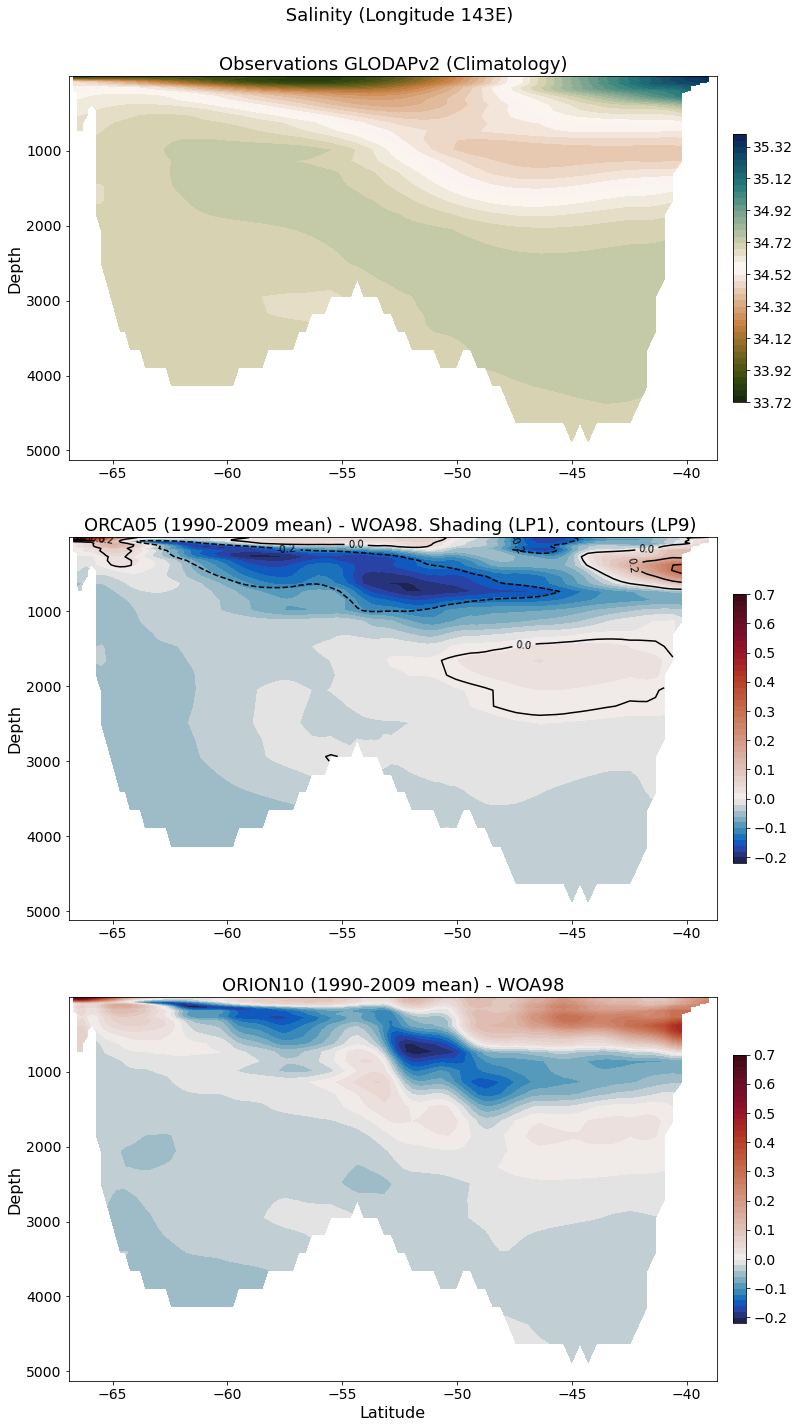

In [29]:
plot_tracer_143e('sal')

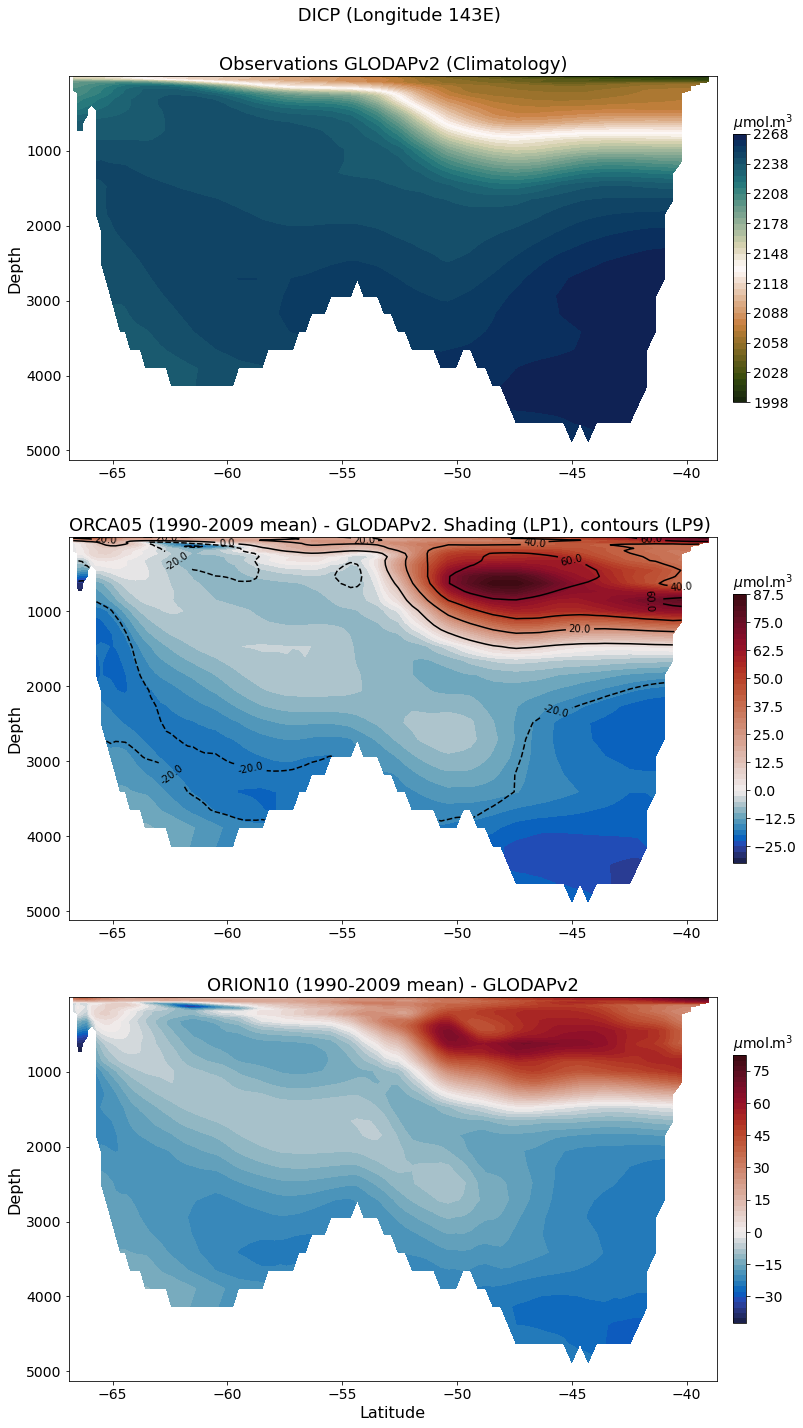

In [30]:
plot_tracer_143e('DICP')

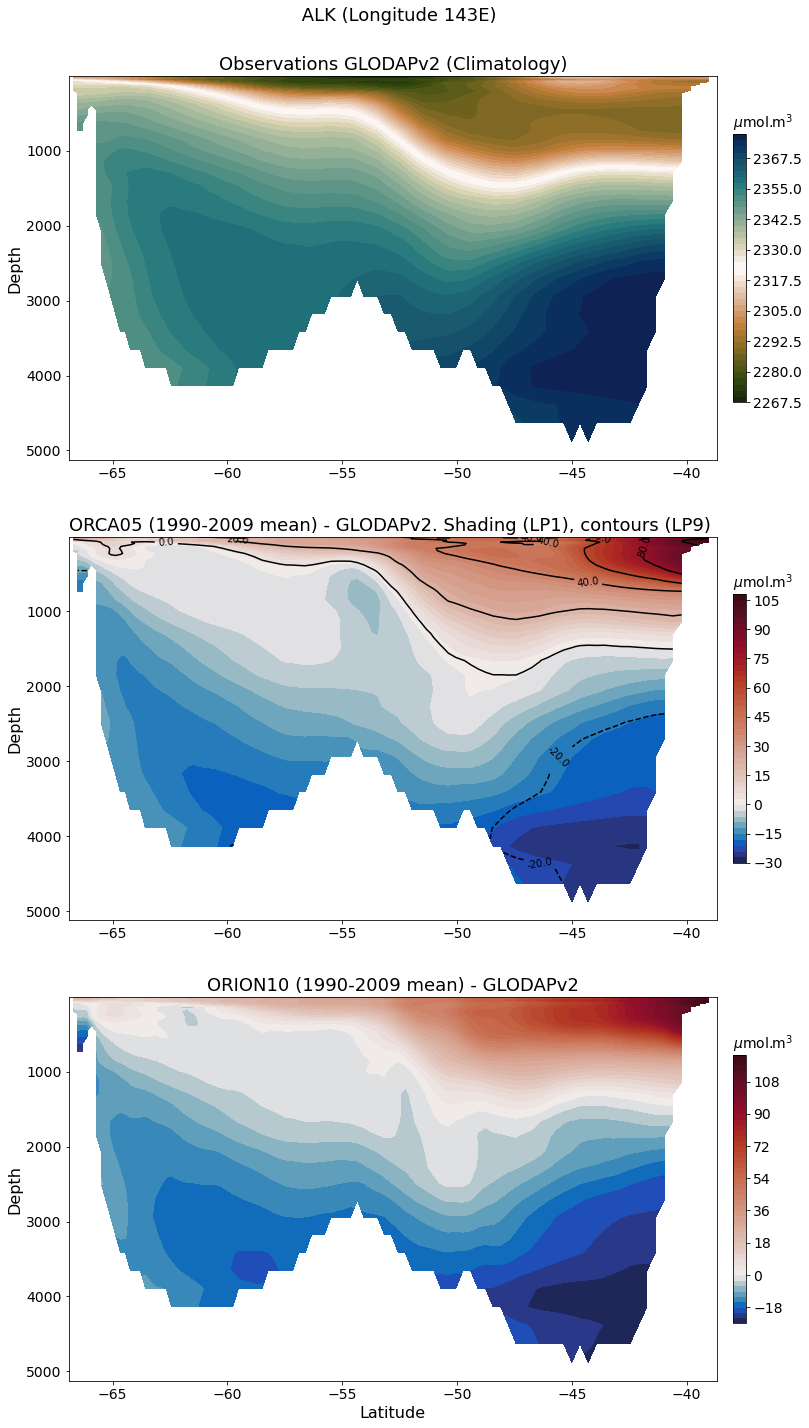

In [31]:
plot_tracer_143e('ALK')

### 103W

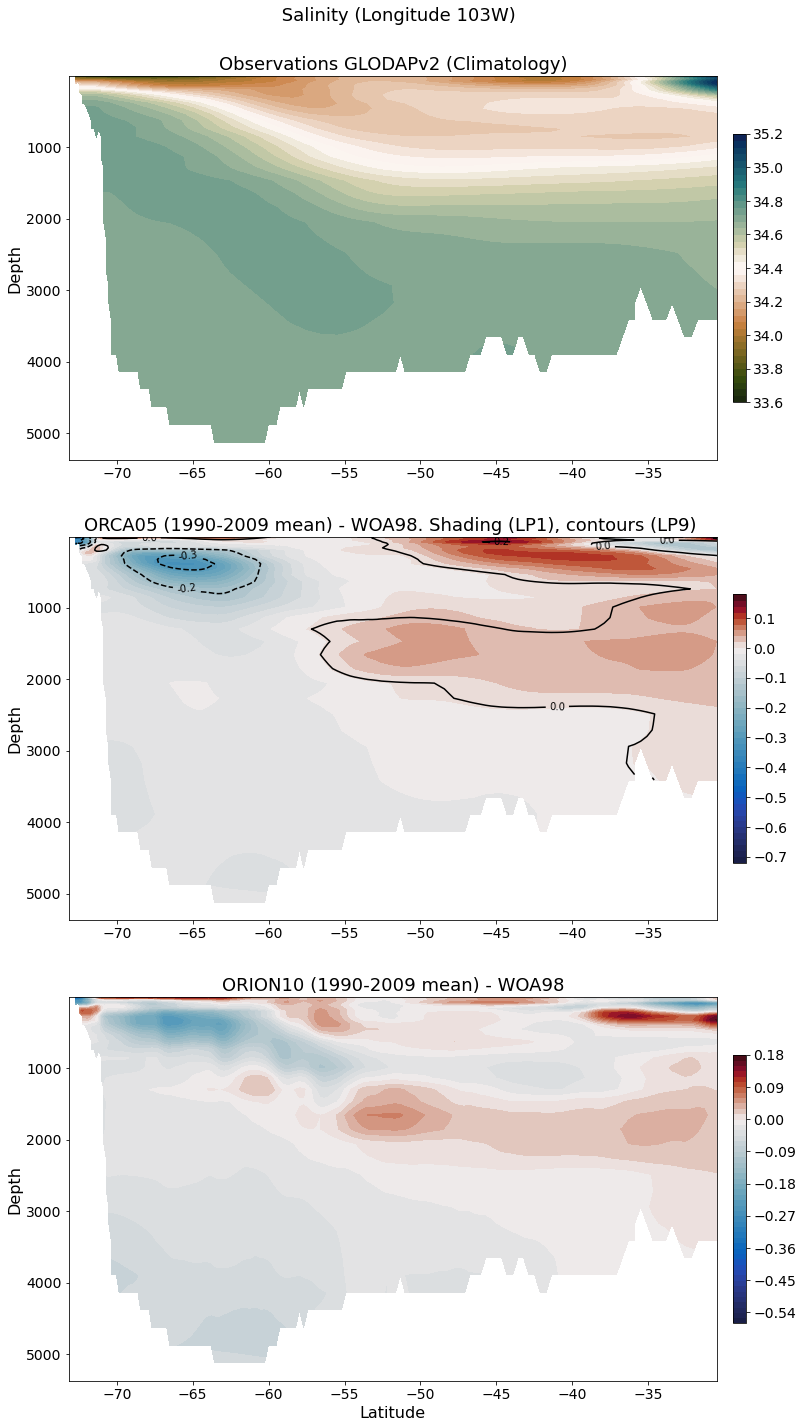

In [35]:
plot_tracer_103w('sal')

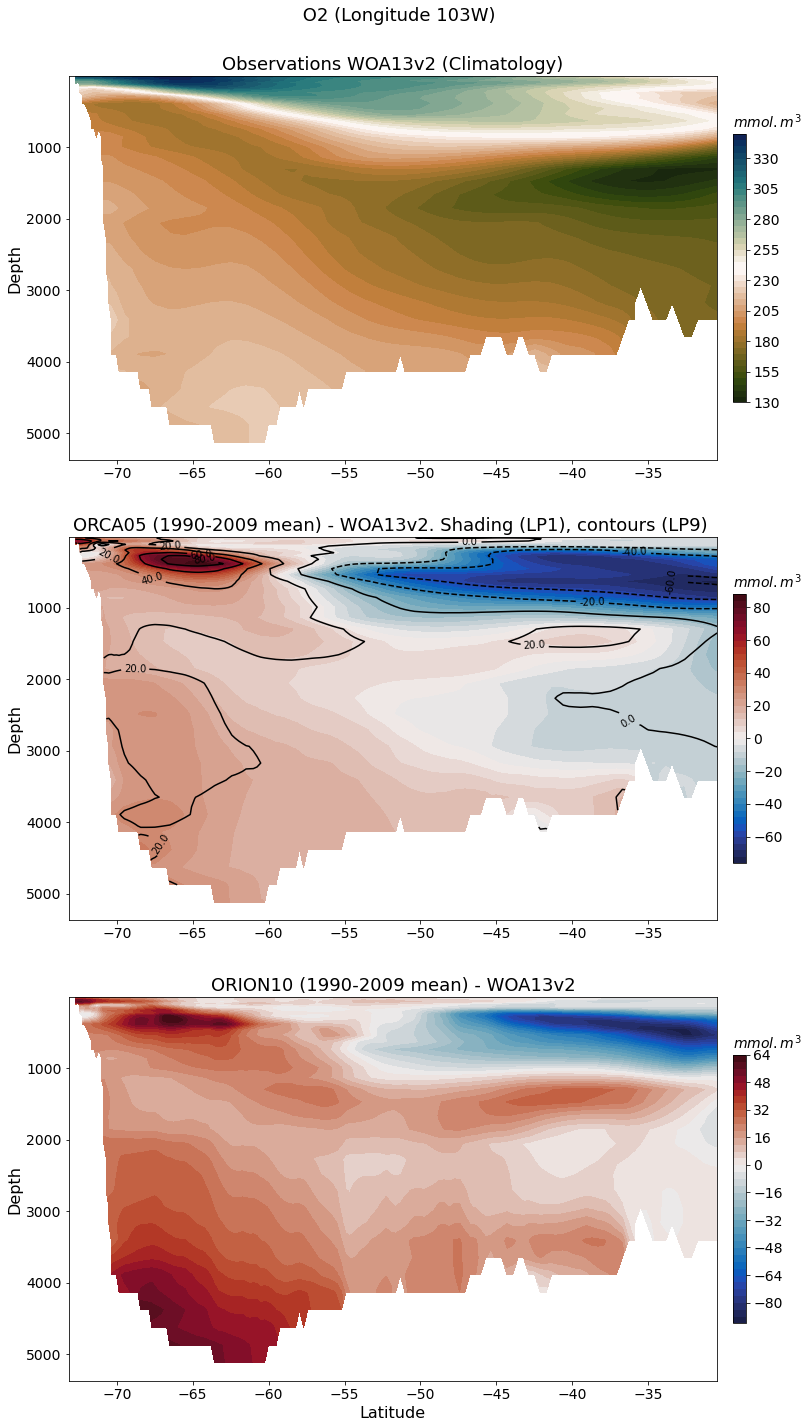

In [36]:
plot_tracer_103w('O2')

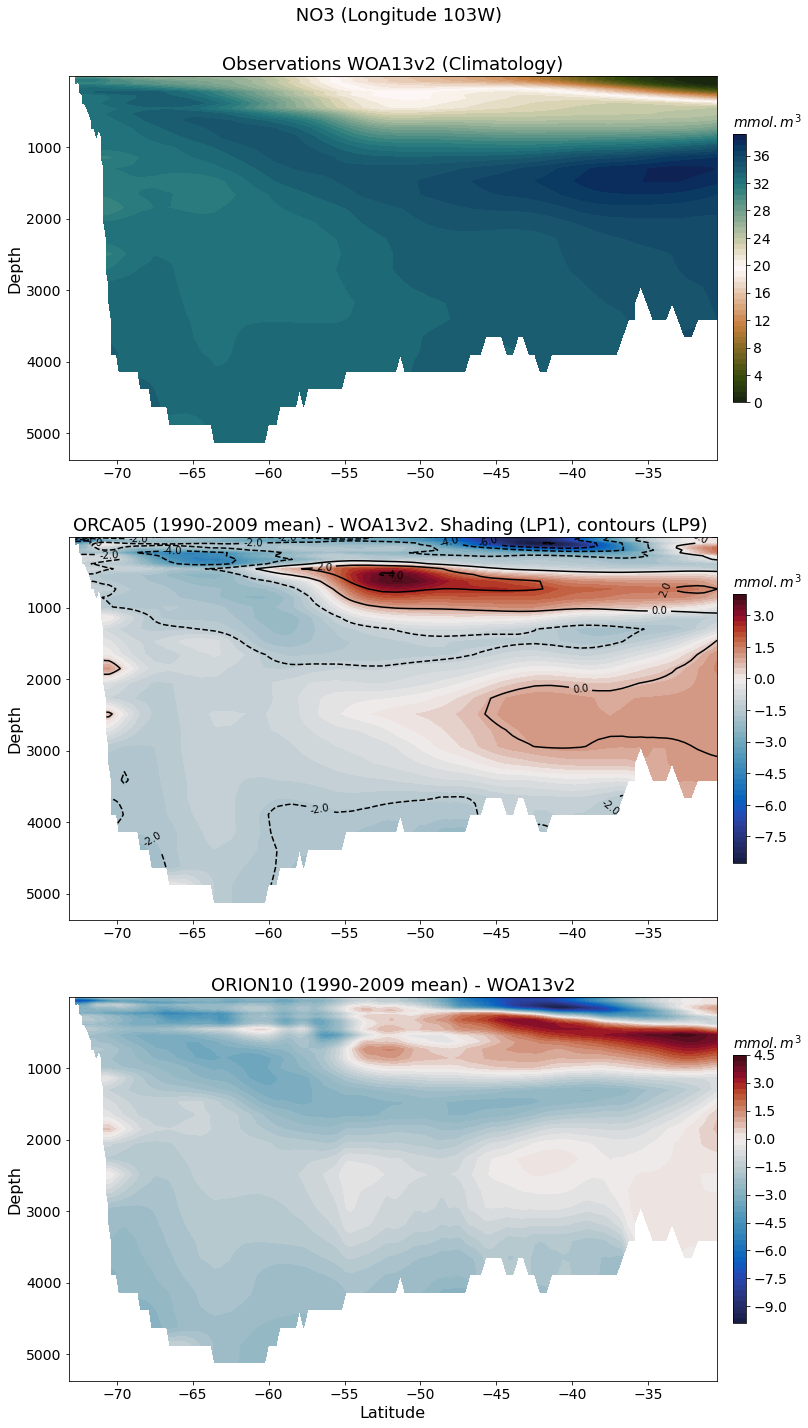

In [37]:
plot_tracer_103w('NO3')

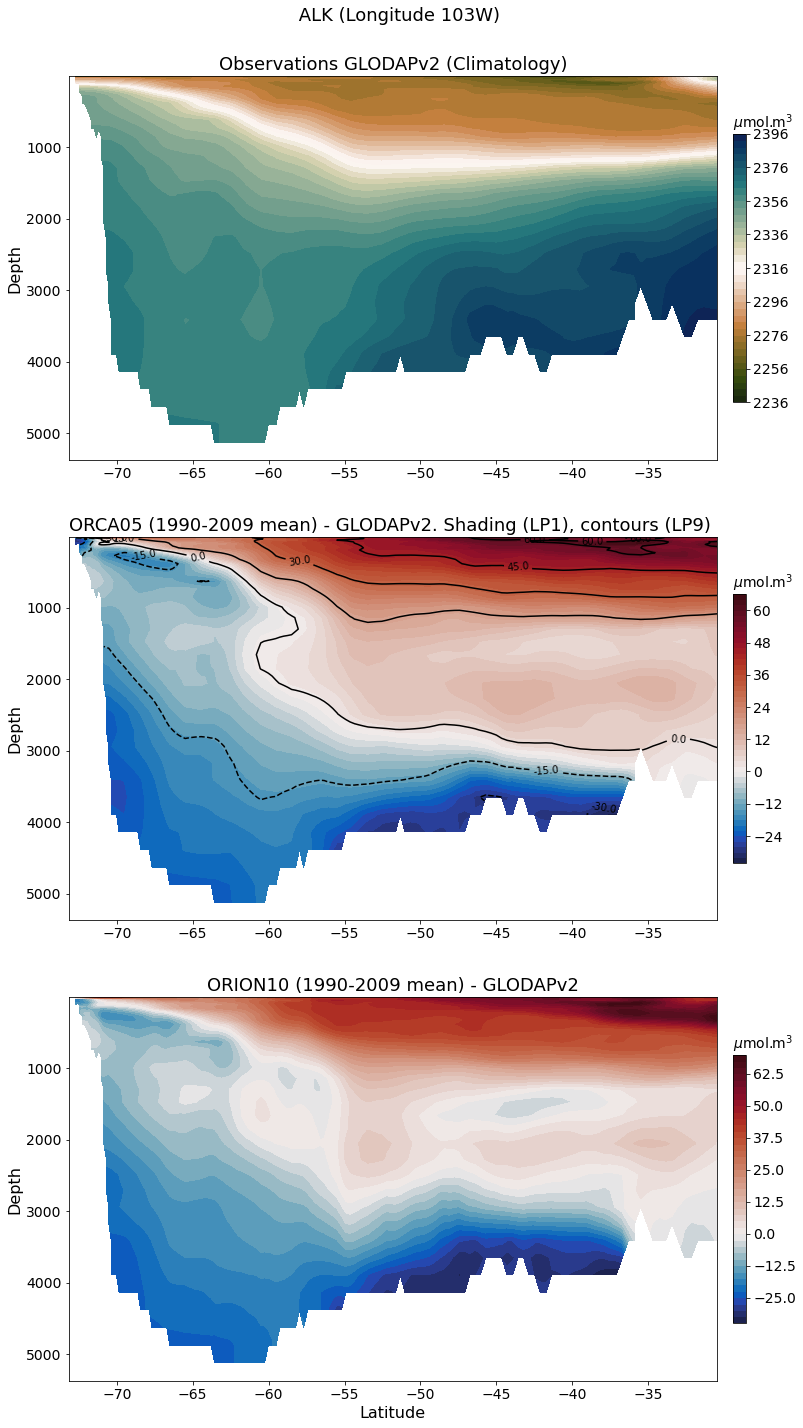

In [39]:
plot_tracer_103w('ALK')

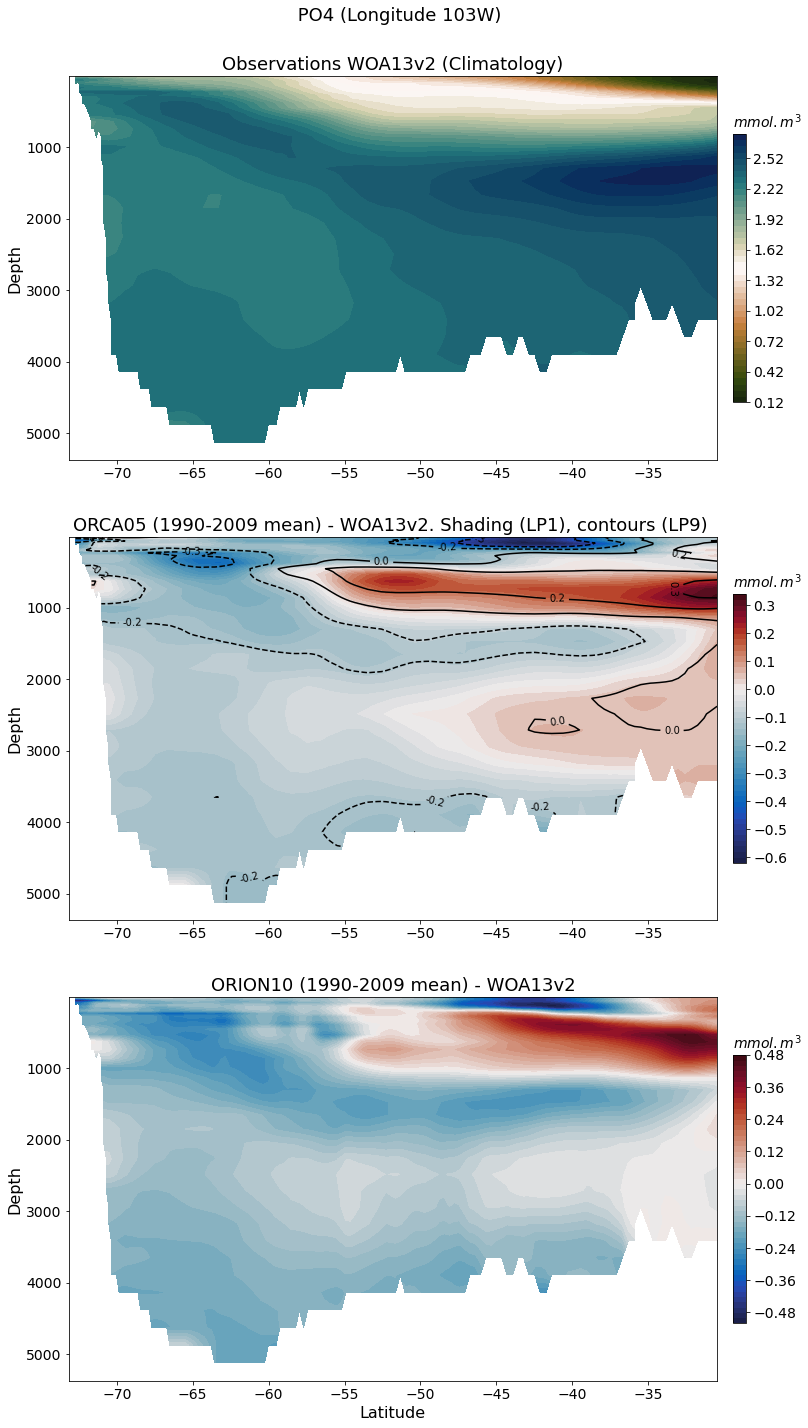

In [40]:
plot_tracer_103w('PO4')

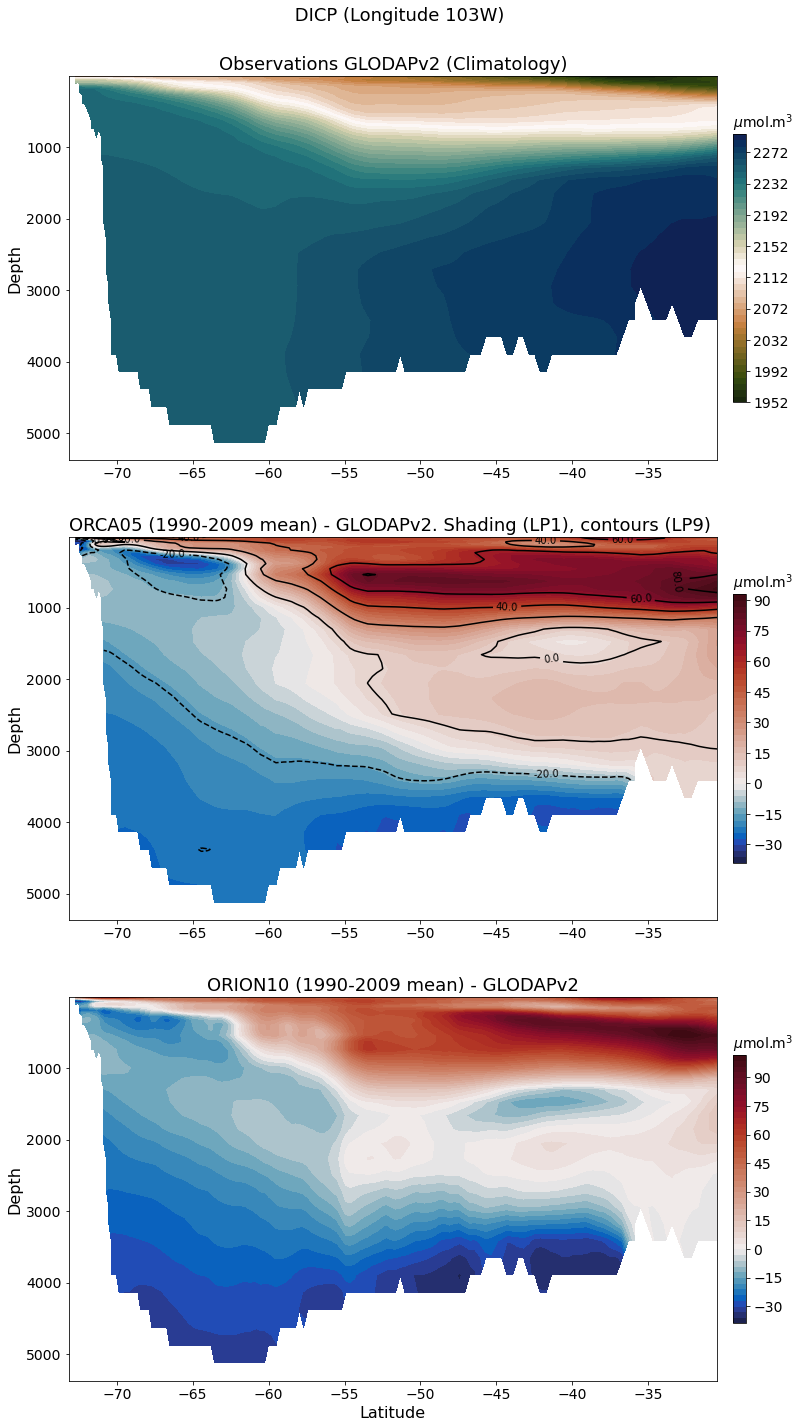

In [41]:
plot_tracer_103w('DICP')

In [38]:
O2_obs_k17.isel(x=slice(1, -1), y=slice(None, -11))

<xarray.DataArray 'o_an' (y: 500, x: 720)>
dask.array<getitem, shape=(500, 720), dtype=float32, chunksize=(100, 100), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

## Plotting - global maps

In [215]:
def plot_global(tracer): 
    
    #geting the variables using the dictionary (dictionary links a string to a variable)
    obs  = vari[tracer+'_obs_k17']
    OR10  = vari[tracer+'_OR10_k17']
    ORC05  = vari[tracer+'_ORC05_k17']
    ORC05_2  = vari[tracer+'_ORC05_2_k17']
    
    # Setting string for colorbar title and max value for contourf plots depending on the tracer
    if tracer == 'NO3' or tracer == 'PO4' or tracer == 'O2':
        str1 = '$mmol.m^{3}$'
        if tracer == 'NO3':
            vmax_t= 20
        elif tracer == 'PO4':
            vmax_t= 1.5
        else:
            vmax_t = 120
    elif tracer == 'DICP' or tracer == 'ALK':
        str1 = '$\mu$mol.m$^{3}$'
        vmax_t= 150
    elif tracer == 'sal':
        str1 = ''
        vmax_t=1 #vmax and vmin in pcontourf
        
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(14,24), subplot_kw={'projection': ccrs.Robinson(central_longitude = -100)}, facecolor="none")
    
    #Suptitle
    if tracer == 'sal':
        plt.suptitle('Salinity',fontsize=18, x=0.45)
    else:
        plt.suptitle('{}'.format(tracer), fontsize=18, x=0.45,)
    
    # Plotting
    axs[0].imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='bilinear', regrid_shape=200)
    
    #Getting data within a threshold range of values to highligh open ocean areas
    if tracer == 'ALK':
        map1 = axs[0].contourf(O2_ORC05_2_k17.nav_lon.values, O2_ORC05_2_k17.nav_lat.values, obs.isel(x=slice(1, -1), y=slice(None, -1)).where(obs.isel(x=slice(1, -1), y=slice(None, -1)) <= 2400),
                              cmap=cm.tarn, transform=ccrs.PlateCarree(),
                               levels= 25, zorder=3)
    elif tracer == 'sal':
        map1 = axs[0].contourf(O2_ORC05_2_k17.nav_lon.values, O2_ORC05_2_k17.nav_lat.values, obs.isel(x=slice(1, -1), y=slice(None, -1)).where((obs.isel(x=slice(1, -1), y=slice(None, -1)) >= 33)
                                                                                                                                              & (obs.isel(x=slice(1, -1), y=slice(None, -1)) <= 37)),
                              cmap=cm.tarn, transform=ccrs.PlateCarree(),
                               levels= 25, zorder=3)
    elif tracer == 'PO4':
        map1 = axs[0].contourf(O2_ORC05_2_k17.nav_lon.values, O2_ORC05_2_k17.nav_lat.values, obs.isel(x=slice(1, -1), y=slice(None, -1)).where(obs.isel(x=slice(1, -1), y=slice(None, -1)) <= 3.5),
                              cmap=cm.tarn, transform=ccrs.PlateCarree(),
                               levels= 25, zorder=3)
        
    else:
         map1 = axs[0].contourf(O2_ORC05_2_k17.nav_lon.values, O2_ORC05_2_k17.nav_lat.values, obs.isel(x=slice(1, -1), y=slice(None, -1)),
                              cmap=cm.tarn, transform=ccrs.PlateCarree(),
                               levels= 25, zorder=3)


    axs[1].imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='bilinear', regrid_shape=200, zorder=0)
    map2 = (ORC05 - obs.isel(x=slice(1, -1), y=slice(None, -1))).plot.contourf(x='nav_lon', y='nav_lat', ax=axs[1], transform=ccrs.PlateCarree(),
                                                                                norm= colors.TwoSlopeNorm(vcenter=0), 
                                                                                vmax= vmax_t, vmin=-vmax_t,
                                                                                levels=25, add_colorbar=False, #add_colorbar=Fause because xarray automatically sets one
                                                                                cmap=cm.balance, zorder=3)
    
    if tracer == 'ALK' or tracer == 'DICP':
        CS = (ORC05_2 - obs.isel(x=slice(1, -1), y=slice(None, -1))).plot.contour(x='nav_lon', y='nav_lat', colors='k', ax=axs[1], transform=ccrs.PlateCarree(),
                                                                                levels=np.arange(-150, 150, 25),
                                                                                  zorder=5)
        axs[1].clabel(CS, inline=True, fmt='%1d')
        
    elif tracer == 'sal' or tracer == 'PO4':
        CS = (ORC05_2 - obs.isel(x=slice(1, -1), y=slice(None, -1))).plot.contour(x='nav_lon', y='nav_lat', colors='k', ax=axs[1], transform=ccrs.PlateCarree(),
                                                                                levels=np.arange(-0.25, 0.25, .25),
                                                                                  zorder=5)
        axs[1].clabel(CS, inline=True, fmt='%1.2f')

        
    else:
        CS = (ORC05_2 - obs.isel(x=slice(1, -1), y=slice(None, -1))).plot.contour(x='nav_lon', y='nav_lat', colors='k', ax=axs[1], transform=ccrs.PlateCarree(),
                                                                                levels=25,
                                                                                  zorder=5)
        
        axs[1].clabel(CS, inline=True, fmt='%1d')    
    
    axs[2].imshow(img, origin='upper', transform=ccrs.PlateCarree(), interpolation='bilinear', regrid_shape=200)
    map3 = (OR10 - obs.isel(x=slice(1, -1), y=slice(None, -1))).plot.contourf(x='nav_lon', y='nav_lat', ax=axs[2], transform=ccrs.PlateCarree(), norm= colors.TwoSlopeNorm(vcenter=0),
                                                                              cmap=cm.balance, 
                                                                              levels=25,
                                                                              zorder=3,
                                                                                vmax=vmax_t, vmin=-vmax_t,
                                                                                add_colorbar=False,
                                                                             )
    
    # Titles
    if tracer == 'sal':
        axs[0].set_title('Observations GLODAPv2 (Climatology)', fontsize=16)
        axs[1].set_title('ORCA05 (1990-2009 mean) - WOA98. Shading (LP1), contours (LP9) ', fontsize=16)
        axs[2].set_title('ORION10 (1990-2009 mean) - WOA98', fontsize=16)
    else:
        if tracer == 'ALK' or tracer == 'DICP':
            axs[0].set_title('Observations GLODAPv2 (Climatology)', fontsize=16)
            axs[1].set_title('ORCA05 (1990-2009 mean) - GLODAPv2. Shading (LP1), contours (LP9) ', fontsize=16)
            axs[2].set_title('ORION10 (1990-2009 mean) - GLODAPv2', fontsize=16)
        else:
            axs[0].set_title('Observations WOA13v2 (Climatology)', fontsize=16)
            axs[1].set_title('ORCA05 (1990-2009 mean) - WOA13v2. Shading (LP1), contours (LP9) ', fontsize=16)
            axs[2].set_title('ORION10 (1990-2009 mean) - WOA13v2', fontsize=16)

    #other parameters
    for ax, maps in zip(axs, [map1, map2, map3]):
            c = plt.colorbar(maps, pad=0.02, shrink=0.7, ax=ax)
            c.ax.set_title(str1, loc='left', fontsize=14)
            c.ax.tick_params(labelsize=14)
            axes.Axes.tick_params(ax, axis='both' ,labelsize=14)


    plt.tight_layout()
    
    savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/figures/'
    plt.savefig(savepath + '{}_global.png'.format(tracer), format='png', facecolor="w")

In [ ]:
plot_global('PO4')

In [ ]:
plot_global('sal')

In [ ]:
plot_global('NO3')

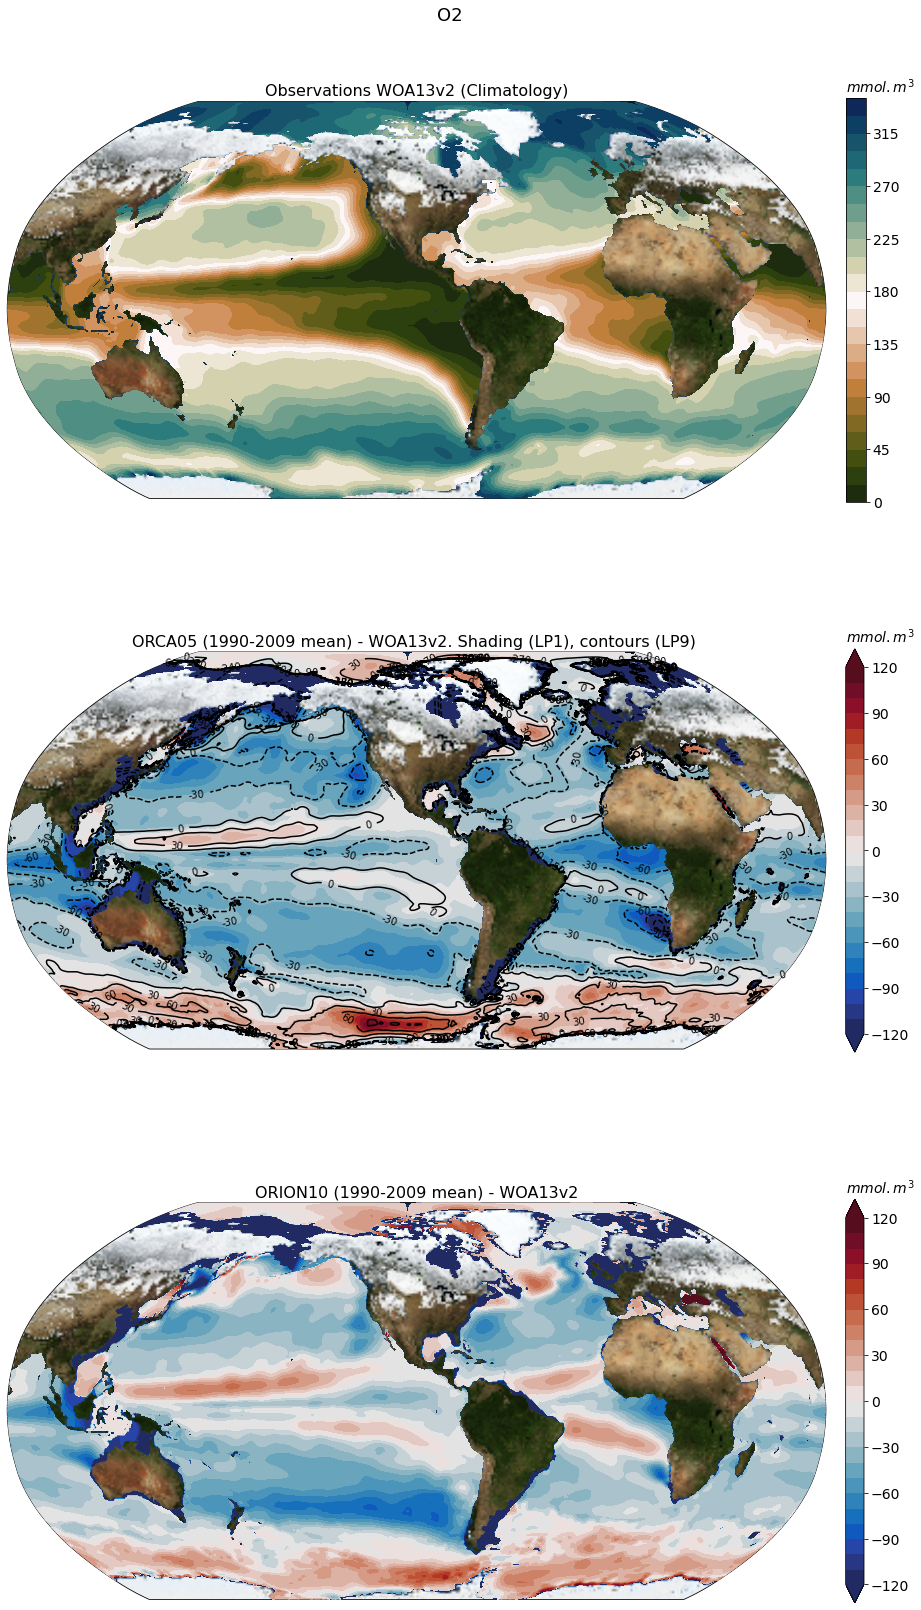

In [220]:
plot_global('O2')

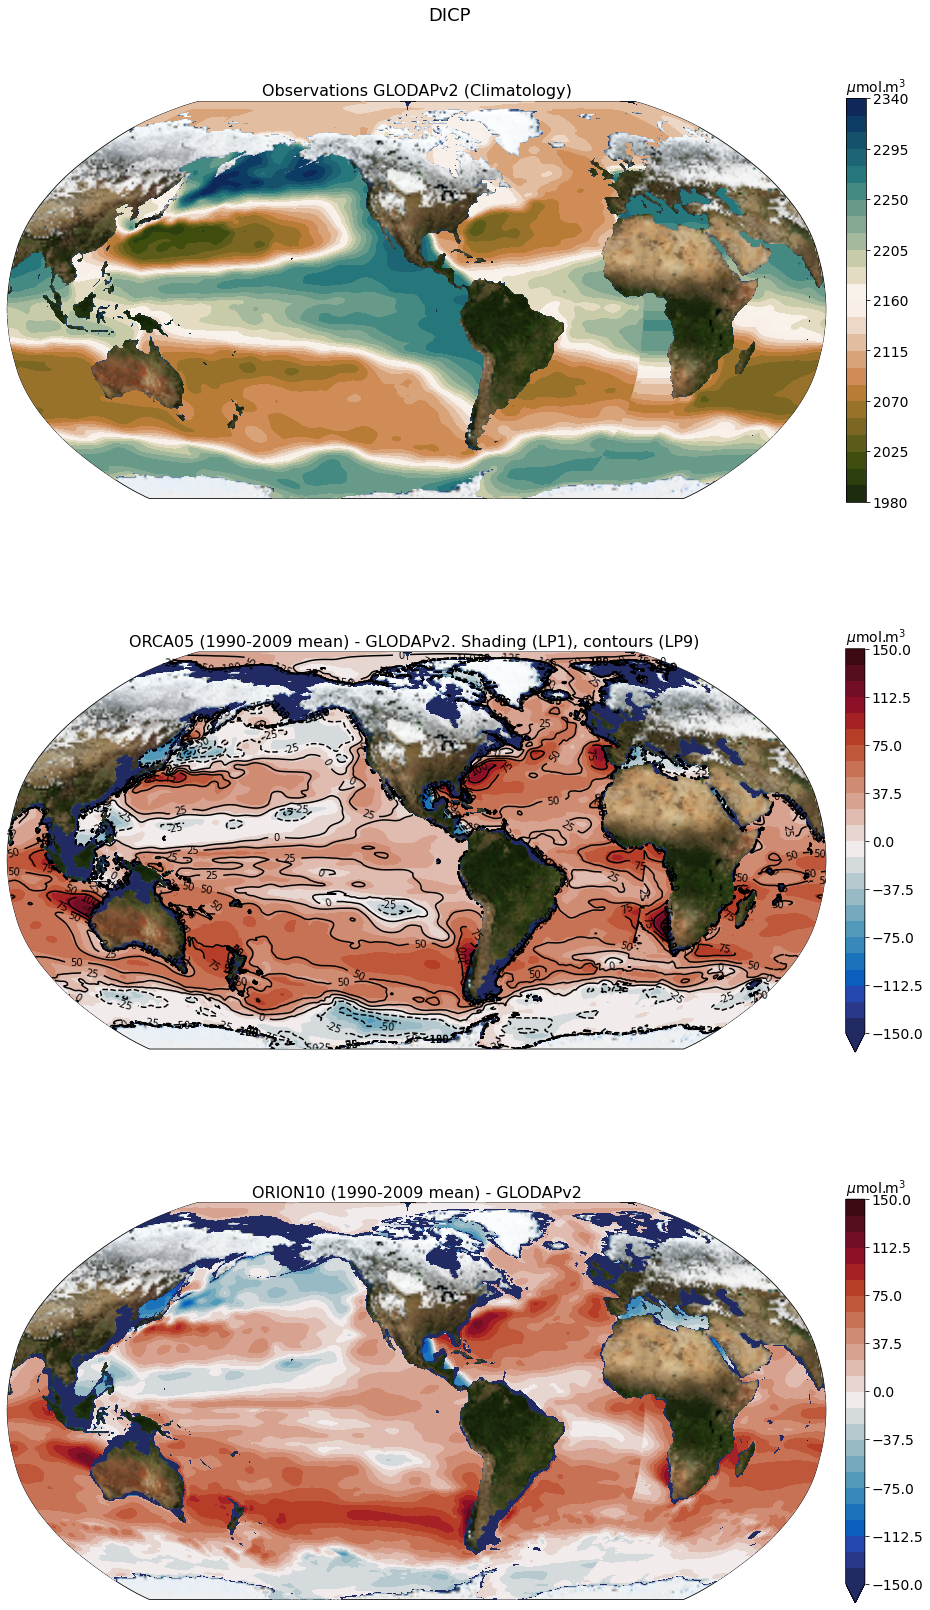

In [218]:
plot_global('DICP')

In [ ]:
plot_global('ALK')

In [ ]:
fig, axs = plt.subplots(figsize=(14,24), subplot_kw={'projection': ccrs.Robinson(central_longitude = -100)}, facecolor="none")

(O2_ORC05_k17 - O2_obs_k17.isel(x=slice(1, -1), y=slice(None, -1))).plot.contourf(x='nav_lon', y='nav_lat', ax=axs, transform=ccrs.PlateCarree(),
                                                                                norm= colors.TwoSlopeNorm(vcenter=0), 
                                                                                #vmax= 120, vmin=-120,
                                                                                levels=25, add_colorbar=False,
                                                                                cmap=cm.balance)
#axs.coastlines() for some reason it takes very long to run